In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [181]:
covid = pd.read_excel('covid.xlsx');
covid

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,19,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,2,28,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,3,40,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,4,62,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,5,23,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,26,no,yes,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,no,no,no,no
483,484,51,no,no,no,no,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no,no,yes,yes,yes,no
484,485,32,no,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no
485,486,30,no,no,no,no,yes,no,yes,yes,no,yes,yes,no,yes,no,no,no,yes,no,yes,yes,no


In [182]:
covid=covid.drop(['#'], axis=1);
covid

,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,19,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,28,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,40,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,62,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,23,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,26,no,yes,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,no,no,no,no
483,51,no,no,no,no,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no,no,yes,yes,yes,no
484,32,no,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no
485,30,no,no,no,no,yes,no,yes,yes,no,yes,yes,no,yes,no,no,no,yes,no,yes,yes,no


In [183]:
covid=covid.drop(['age'], axis=1);
covid

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,no,yes,no,no,no,no,yes,yes,yes,yes,yes,yes,no,no,no,yes,yes,no,no,no,no
483,no,no,no,no,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no,no,yes,yes,yes,no
484,no,no,no,no,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no
485,no,no,no,no,yes,no,yes,yes,no,yes,yes,no,yes,no,no,no,yes,no,yes,yes,no


In [184]:
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,487,486,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487
unique,2,3,4,3,4,2,3,3,2,4,3,2,2,2,2,2,2,2,2,2,2
top,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,436,275,387,450,255,462,239,282,445,333,276,394,426,380,471,423,449,326,380,425,479


In [185]:
covid.Diarrhea.unique()

array(['yes', 'no', 'Yes', 'No'], dtype=object)

In [186]:
covid=covid.replace({'yes':'Yes', 'no':'No'});
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,487,486,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487,487
unique,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
freq,436,283,410,450,267,462,249,282,445,341,280,394,426,380,471,423,449,326,380,425,479


In [187]:
covid.Abdominal_pain.unique()

array(['Yes', 'No', 'es'], dtype=object)

In [188]:
covid=covid.replace({'es':'Yes'});

In [189]:
covid.Abdominal_pain.unique()

array(['Yes', 'No'], dtype=object)

In [190]:
np.where(pd.isnull(covid))


(array([396]), array([1]))

In [191]:
covid=covid.drop(covid.index[396])
np.where(pd.isnull(covid))

(array([], dtype=int64), array([], dtype=int64))

In [192]:
covid=covid.replace({'Yes':1, 'No':0});
covid

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0
483,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0
484,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0
485,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0


In [193]:
covid=covid.drop_duplicates(keep=False)
covid.shape

(205, 21)

In [194]:
covid.describe()

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.146341,0.458537,0.204878,0.160976,0.541463,0.097561,0.497561,0.57561,0.175610,0.429268,0.448780,0.302439,0.234146,0.346341,0.068293,0.234146,0.185366,0.321951,0.370732,0.248780,0.039024
std,0.354313,0.499498,0.404601,0.368408,0.499498,0.297446,0.501218,0.49546,0.381419,0.496183,0.498587,0.460439,0.424501,0.476968,0.252865,0.424501,0.389545,0.468368,0.484183,0.433365,0.194127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3af3063a90>,
      dtype=object)

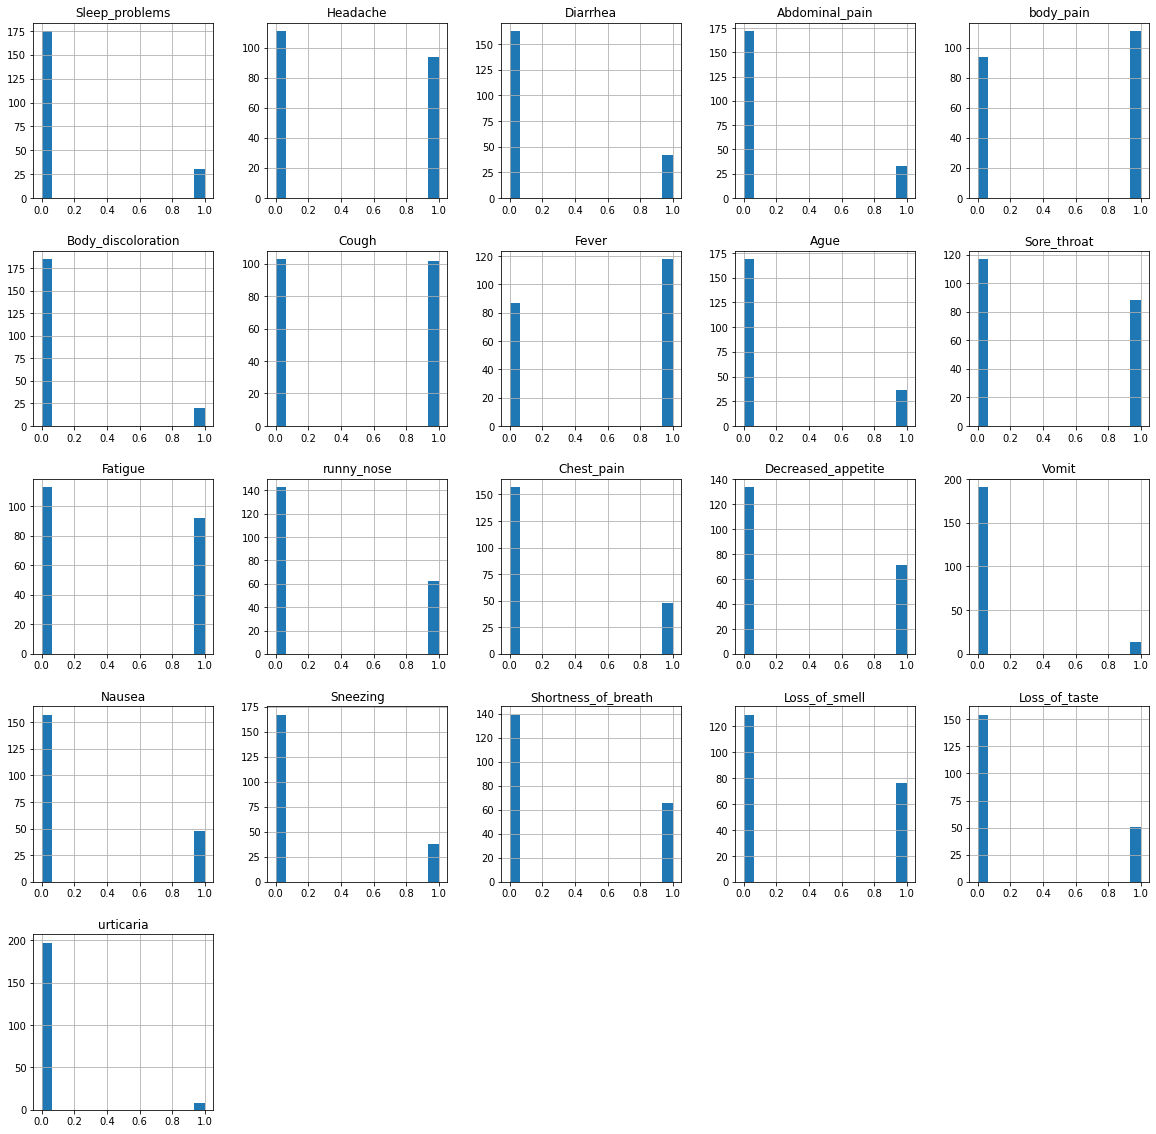

In [195]:
covid.hist(bins=15,figsize=(20,20))

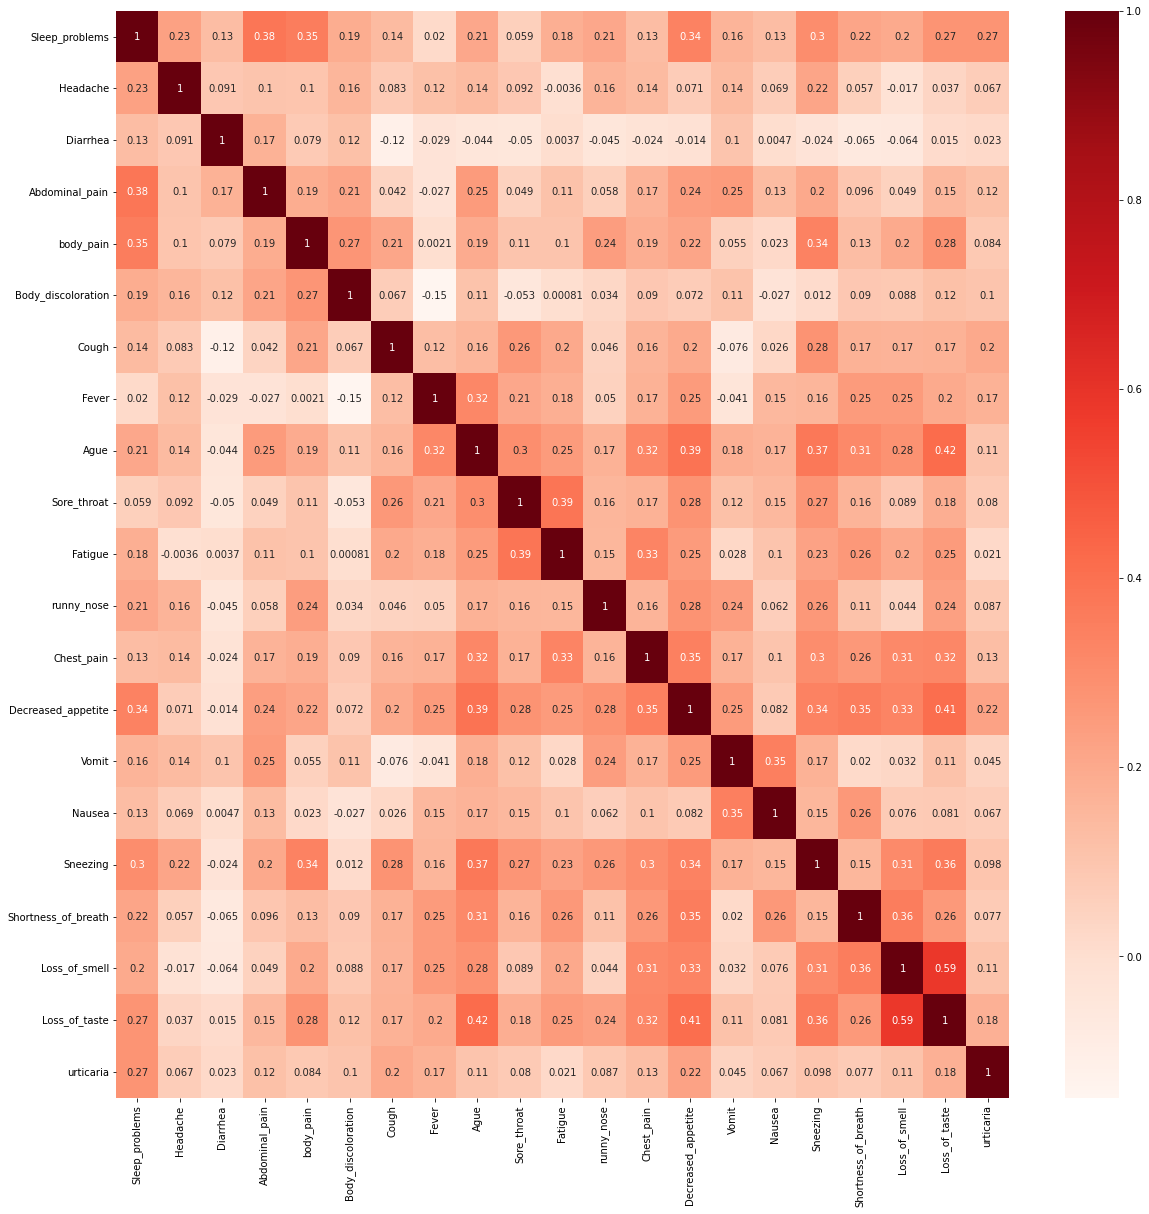

In [196]:
plt.figure(figsize=(20,20))
cor = covid.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [197]:
covid =covid.drop(['urticaria','Vomit','Body_discoloration' ,'Abdominal_pain','Sneezing'],axis=1)
covid


,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0
483,0,0,0,1,0,0,1,1,1,0,1,1,0,1,1,1
484,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1
485,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1


In [198]:
columns={}
for col in covid.columns:
    columns[col]=[1,0];
columns

{'Ague': [1, 0],
 'Chest_pain': [1, 0],
 'Cough': [1, 0],
 'Decreased_appetite': [1, 0],
 'Diarrhea': [1, 0],
 'Fatigue': [1, 0],
 'Fever': [1, 0],
 'Headache': [1, 0],
 'Loss_of_smell': [1, 0],
 'Loss_of_taste': [1, 0],
 'Nausea': [1, 0],
 'Shortness_of_breath': [1, 0],
 'Sleep_problems': [1, 0],
 'Sore_throat': [1, 0],
 'body_pain': [1, 0],
 'runny_nose': [1, 0]}

In [199]:
from itertools import product
All_V=pd.DataFrame([row for row in product(*columns.values())],columns=columns.keys())

All_V

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
65532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
65533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
65534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [200]:
df4 = pd.concat([covid,All_V])
no_covid=df4.drop_duplicates(keep=False)
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
65530,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
65532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
65534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [201]:
no_covid=no_covid[(no_covid.sum(axis=1)<8)  & (no_covid.sum(axis=1)>3)];
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
511,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
767,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
895,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0
959,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0
991,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65505,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
65506,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
65508,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1
65512,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [202]:
no_covid=no_covid.sample(n=250)
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste
36467,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0
62012,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1
61899,0,0,0,0,1,1,1,0,0,0,1,1,0,1,0,0
7533,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0
6589,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1
58767,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0
42938,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1
39403,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0


In [203]:
no_covid['class']=0;
covid['class']=1;
no_covid

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste,class
36467,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0
62012,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0
61899,0,0,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0
7533,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
6589,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
58767,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0
42938,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
39403,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0


In [204]:
dataset =pd.concat([no_covid,covid],ignore_index=True)
dataset

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste,class
0,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0
1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0
2,0,0,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0
3,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0,1
451,0,0,0,1,0,0,1,1,1,0,1,1,0,1,1,1,1
452,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1
453,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,1,1


In [205]:
X=dataset.iloc[:,:-1]
y =dataset.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
450    1
451    1
452    1
453    1
454    1
Name: class, Length: 455, dtype: int64

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4)

In [207]:
dataset_nominal=dataset.replace({1:'Yes', 0:'No'});
dataset_nominal

,Sleep_problems,Headache,Diarrhea,body_pain,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Nausea,Shortness_of_breath,Loss_of_smell,Loss_of_taste,class
0,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Yes,Yes,No,No,No
1,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No
2,No,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes,No,No,No
3,Yes,Yes,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,No,Yes,No,No
4,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes
451,No,No,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes
452,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
453,No,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes


In [221]:


h = ['0', '0', '0', '0', '0', '0','0','0','0','0','0','0','0','0','0','0','0','0','0','0']

for index, row in dataset.iterrows():
    if row[-1] == 'Yes':
        j = 0
        
        for col in row:
            if col != 'Yes':
                if col != h[j] and h[j] == '0':
                    h[j] = col
                elif col != h[j] and h[j] != '0':
                    h[j] = '?'
                    
            j = j + 1
 
    
print('Maximally Specific Hypothesis: ', h)

Maximally Specific Hypothesis:  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [213]:
import numpy as np
import pandas as pd

def learn(concepts, target):
    
    specific_h = concepts[0].copy()
    
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    
    # The learning iterations
    for i, h in enumerate(concepts):
        
        # Checking if the hypothesis has a positive target
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                
                # Change values in S & G only if values change
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
                    
        # Checking if the hypothesis has a positive target
        if target[i] == "No":
            for x in range(len(specific_h)):
                
                # For negative hyposthesis change values only  in G
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    
    # find indices where we have empty rows, meaning those that are unchanged
    indices = [i for i,val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        # remove those rows from general_h
        general_h.remove(['?', '?', '?', '?', '?', '?'])
        
    # Return final values
    return specific_h, general_h
sample=dataset.sample(n=30);
concepts =np.array(sample.iloc[:,:-1]);
target=np.array(sample.iloc[:,-1]);
s_final, g_final = learn(concepts, target)
print("Final S:", s_final, sep="\n")
print("Final G:", g_final, sep="\n")

Final S:
['?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?']
Final G:
[['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?

In [222]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred
gnb.score(X_test, y_test)

0.7299270072992701

Text(0, 0.5, 'Error Rate')

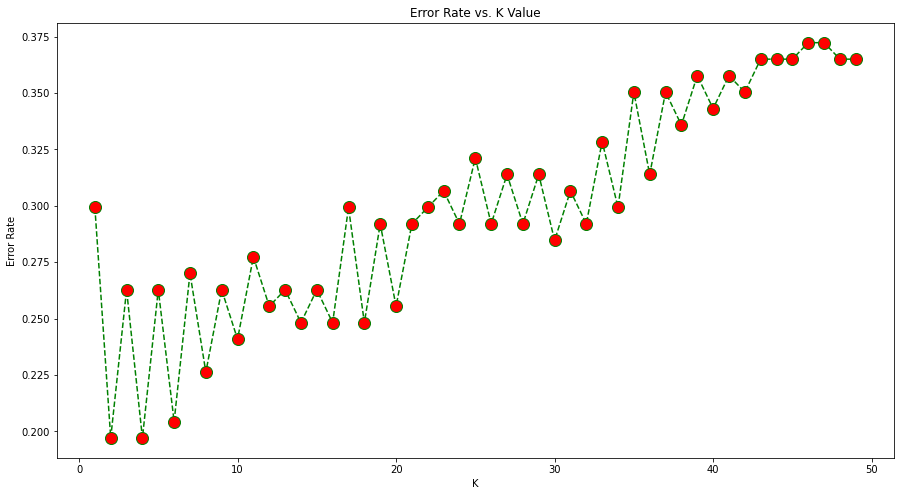

In [217]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(15,8))
plt.plot(range(1,50),error_rate,color='green', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [223]:

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred=neigh.predict(X_test)
y_pred
neigh.score(X_test, y_test)

0.7372262773722628

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
y_pred
clf.score(X_test, y_test)

0.7757009345794392

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,splitter='random')
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
y_pred
clf.score(X_test, y_test)

0.7850467289719626

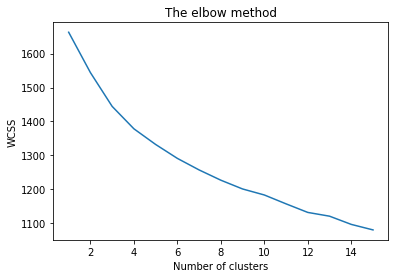

In [224]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [225]:
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)
kmeans.labels_
print(accuracy_score(y,kmeans.labels_))

0.5384615384615384


In [227]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []
models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))
print('Models appended...')
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10,shuffle=True, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Models appended...
Logistic Regression: 68.91129032258065
Naive Bayes: 71.40120967741936
K-Nearest Neighbour: 78.93145161290323
Decision Tree: 81.76411290322581
Support Vector Machine-linear: 72.01612903225806
Support Vector Machine-rbf: 84.8991935483871
Random Forest: 81.76411290322581
MLP: 84.91935483870968
AdaBoostClassifier: 68.28629032258064
GradientBoostingClassifier: 84.5866935483871


In [229]:
dataset.to_excel("covid-out.xlsx",index=False)